KMeans: K 均值聚类算法。

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
# from sklearn.metrics import euclidean_distance
from sklearn.metrics.pairwise import euclidean_distances

%matplotlib inline

In [8]:

watermelon = np.array([[ 0.697  ,0.46 ],
                         [ 0.774  ,0.376],
                         [ 0.634  ,0.264],
                         [ 0.608  ,0.318],
                         [ 0.556  ,0.215],
                         [ 0.403  ,0.237],
                         [ 0.481  ,0.149],
                         [ 0.437  ,0.211],
                         [ 0.666  ,0.091],
                         [ 0.243  ,0.267],
                         [ 0.245  ,0.057],
                         [ 0.343  ,0.099],
                         [ 0.639  ,0.161],
                         [ 0.657  ,0.198],
                         [ 0.36   ,0.37 ],
                         [ 0.593  ,0.042],
                         [ 0.719  ,0.103],
                         [ 0.359  ,0.188],
                         [ 0.339  ,0.241],
                         [ 0.282  ,0.257],
                         [ 0.748  ,0.232],
                         [ 0.714  ,0.346],
                         [ 0.483  ,0.312],
                         [ 0.478  ,0.437],
                         [ 0.525  ,0.369],
                         [ 0.751  ,0.489],
                         [ 0.532  ,0.472],
                         [ 0.473  ,0.376],
                         [ 0.725  ,0.445],
                         [ 0.446  ,0.459]])

In [23]:
def kmeans(data, k=3):
    m = data.shape[0]
    index = random.sample(range(m), k)
    mu = data[index]
    print index,mu
    
    while True:
        C = defaultdict(list)
        for j in range(0, m):
            dij = [euclidean_distances(data[j], mu[i])for i in range(k)]
            lambda_j = np.argmin(dij)
            C[lambda_j].append(data[j].tolist())
        new_mu = [np.mean(C[i], axis=0).tolist() for i in range(k)]
        if (euclidean_distances(np.array(new_mu).all(), np.array(mu).all()) > 1e-9):
            mu = new_mu
        else:
            break
    return C, mu

In [24]:
k = 2
res, mu = kmeans(watermelon, k)

[4, 11] [[0.556 0.215]
 [0.343 0.099]]


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lo

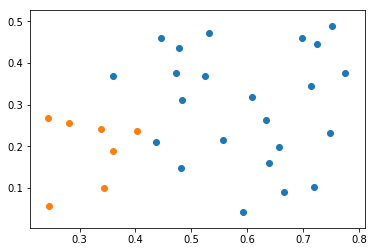

In [25]:
for i in range(k):
    res_i = np.array(res[i])
    plt.scatter(res_i[:,0], res_i[:,1])
plt.show()